In [2]:
#from shapely.geometry import Point
import seaborn as sns
import pandas as pd
#import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
# import folium
# from folium.plugins import MarkerCluster
# from folium.plugins import FastMarkerCluster


In [3]:
Covid_Count_df = pd.read_csv('covid_count.csv')


In [4]:
Covid_Count_df['Zip'] =Covid_Count_df['Zip']

In [5]:
Covid_Count_df.head(10)

,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1
5,3/11/2020,37210.0,1
6,3/11/2020,37212.0,2
7,3/11/2020,37214.0,1
8,3/11/2020,37215.0,3
9,3/12/2020,NaN,1


In [14]:
Covid_Count_df.rename(columns={'Specimen Collection Date':'Covid_test_date', 'Zip': 'zipcode','Cases':'cases'},inplace =True)

In [92]:
Covid_Count_df.head()

,Covid_test_date,zipcode,cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1


In [6]:
Vaccine_protocol = pd.read_csv ('vaccine_with_protocol.csv')

In [7]:
Vaccine_protocol.head()

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


<b>Filtering Vaccine_protocol on dose_nbr ==1

In [11]:
Vaccine_filter = Vaccine_protocol[Vaccine_protocol.dose_nbr == 1.0]
Vaccine_filter.head()
Vaccine_filter


,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot
5,2020-12-17,37013.0,16.0,1.0,two-shot
...,...,...,...,...,...
6686,2021-04-07,37221.0,81.0,1.0,two-shot
6687,2021-04-07,37221.0,2.0,1.0,one-shot
6689,2021-04-07,37228.0,9.0,1.0,two-shot
6691,2021-04-07,NaN,8.0,1.0,two-shot


In [16]:
Vaccine_filter.shape

(3967, 5)

In [26]:
most_vax_given_zip = Vaccine_filter.groupby('zipcode')['count_given'].sum()



In [27]:
most_vax_given_zip

zipcode
37013.0    18465.0
37027.0      352.0
37069.0       50.0
37072.0     8460.0
37076.0    11113.0
37080.0     1970.0
37115.0     8520.0
37138.0     7152.0
37189.0     1056.0
37201.0      576.0
37203.0     8029.0
37204.0     6410.0
37205.0    14666.0
37206.0    10124.0
37207.0     9255.0
37208.0     5526.0
37209.0    13600.0
37210.0     3747.0
37211.0    19175.0
37212.0     7160.0
37213.0       72.0
37214.0     9198.0
37215.0    12132.0
37216.0     7230.0
37217.0     5837.0
37218.0     4391.0
37219.0      638.0
37220.0     3239.0
37221.0    17222.0
37228.0      655.0
37238.0        3.0
Name: count_given, dtype: float64

In [29]:
most_vax_given_zip.shape

(31,)

In [28]:
most_vax_given_zip.sort_values(ascending =False)

zipcode
37211.0    19175.0
37013.0    18465.0
37221.0    17222.0
37205.0    14666.0
37209.0    13600.0
37215.0    12132.0
37076.0    11113.0
37206.0    10124.0
37207.0     9255.0
37214.0     9198.0
37115.0     8520.0
37072.0     8460.0
37203.0     8029.0
37216.0     7230.0
37212.0     7160.0
37138.0     7152.0
37204.0     6410.0
37217.0     5837.0
37208.0     5526.0
37218.0     4391.0
37210.0     3747.0
37220.0     3239.0
37080.0     1970.0
37189.0     1056.0
37228.0      655.0
37219.0      638.0
37201.0      576.0
37027.0      352.0
37213.0       72.0
37069.0       50.0
37238.0        3.0
Name: count_given, dtype: float64

In [37]:
# How i could add a column name for the most_vax_given ? , Had my code re_written as follows it would be perfect to get the desired column 
most_vax_given_zip = Vaccine_filter.groupby('zipcode')['count_given'].sum()
most_vax_given_df = pd.DataFrame(most_vax_given_zip).reset_index()
most_vax_given_df.columns = ['zipcode','total_vaccines_given']
#print(most_vax_given_df)
most_vax_given_df



,zipcode,total_vaccines_given
0,37013.0,18465.0
1,37027.0,352.0
2,37069.0,50.0
3,37072.0,8460.0
4,37076.0,11113.0
5,37080.0,1970.0
6,37115.0,8520.0
7,37138.0,7152.0
8,37189.0,1056.0
9,37201.0,576.0


In [41]:
most_vax_given_df.sort_values(by ='total_vaccines_given',ascending =False)

,zipcode,total_vaccines_given
18,37211.0,19175.0
0,37013.0,18465.0
28,37221.0,17222.0
12,37205.0,14666.0
16,37209.0,13600.0
22,37215.0,12132.0
4,37076.0,11113.0
13,37206.0,10124.0
14,37207.0,9255.0
21,37214.0,9198.0


**Top -10 zipcodes for Vaccination given**

    

In [47]:
most_vax_given_df_top10 = most_vax_given_df.nlargest(10,['total_vaccines_given'])
most_vax_given_df_top10['zipcode'] = most_vax_given_df_top10.zipcode.astype('int64',errors='ignore')
most_vax_given_df_top10['zipcode'] = most_vax_given_df_top10.zipcode.astype('category',errors='ignore')


In [48]:
most_vax_given_df_top10

,zipcode,total_vaccines_given
18,37211,19175.0
0,37013,18465.0
28,37221,17222.0
12,37205,14666.0
16,37209,13600.0
22,37215,12132.0
4,37076,11113.0
13,37206,10124.0
14,37207,9255.0
21,37214,9198.0


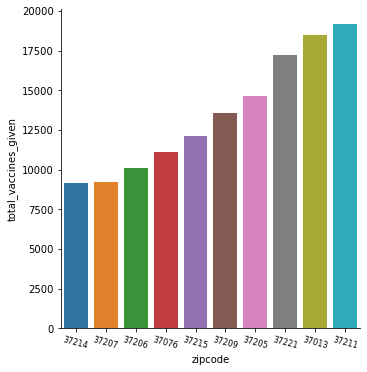

In [86]:
#fig=plt.figure(figsize=(120,8))
sns.catplot(x='zipcode',y='total_vaccines_given',data = most_vax_given_df_top10,kind='bar',order=most_vax_given_df_top10.sort_values('total_vaccines_given').zipcode)
plt.tick_params(axis='x',labelsize=8)
#fig=plt.figure(figsize=(500,100))
#plt.tick_params(axis='x',labelsize=8)
plt.xticks(rotation=-15)
plt.show()                                                                                                                                    

<b>Bringing Income_Data into a table and merged with the other two data frames 

In [52]:
#Andrew's code 
income_data = pd.read_excel("income_data.xlsx", skiprows = 1, header=[0, 1], sheet_name = 1)
income_data = income_data[income_data.columns.drop(list(income_data.filter(regex='Error')))]
income_data.columns = income_data.columns.droplevel(1)
income_clean = income_data.set_index('Unnamed: 0_level_0').T.reset_index().rename({"index": "zipcode"}, axis = 1)

#T in the last code to mean Transpose 

<b> changing the data type and Merging with income_clean

In [54]:
income_clean['zipcode'] =income_clean['zipcode'].astype(float)


In [87]:
Merged_IV_df = pd.merge(left = most_vax_given_df, right = income_clean, 
                    left_on = 'zipcode', right_on = 'zipcode')

In [91]:
Merged_IV_df['zipcode'] = Merged_IV_df['zipcode'].astype('int')


In [95]:
Merged_IV_df


,zipcode,total_vaccines_given,Total:,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",* Base value of zero; no percentage available
0,37013,18465.0,1,0.0400034,0.0287384,0.0336264,0.0491895,0.0462679,0.0473354,0.0491053,0.0544147,0.0491053,0.111133,0.126696,0.154704,0.0996432,0.0478411,0.0340478,0.0281484,NaN
1,37027,352.0,1,0.0230576,0.00867168,0.0123308,0.0125313,0.0127318,0.0125313,0.0158396,0.0269674,0.0236591,0.0299248,0.0619048,0.0932832,0.108622,0.0846115,0.142206,0.331128,NaN
2,37072,8460.0,1,0.0426075,0.0328732,0.0363839,0.053778,0.0548153,0.0403734,0.0413309,0.0453204,0.0434054,0.0873693,0.104604,0.17442,0.0893641,0.0625549,0.0520227,0.0387776,NaN
3,37076,11113.0,1,0.0401403,0.0232906,0.0359998,0.0285238,0.0544022,0.0425556,0.0524469,0.03807,0.052792,0.0830985,0.123411,0.15228,0.0982805,0.0671114,0.0686066,0.0389902,NaN
4,37080,1970.0,1,0.0371846,0.0395086,0.0843293,0.0434927,0.062417,0.0355246,0.0747012,0.0335325,0.0305445,0.0876494,0.0869854,0.12749,0.0873174,0.0534529,0.0534529,0.062417,NaN
5,37115,8520.0,1,0.0492429,0.0574197,0.0569958,0.069473,0.0732283,0.0603876,0.0667474,0.0513022,0.0648092,0.100545,0.111932,0.119079,0.0629316,0.0190188,0.0199273,0.0169594,NaN
6,37138,7152.0,1,0.0357297,0.0261226,0.023532,0.0375648,0.0443653,0.0322755,0.0336788,0.0728627,0.033247,0.0743739,0.124676,0.165695,0.103843,0.0731865,0.074158,0.0446891,NaN
7,37189,1056.0,1,0.0344599,0.000662691,0.0563287,0.0337972,0.0178926,0.0271703,0.0477137,0.019218,0.0530152,0.074884,0.122598,0.186216,0.11332,0.0954274,0.0656064,0.0516899,NaN
8,37201,576.0,1,0.117871,0,0,0,0.0342205,0,0,0.0779468,0,0.0703422,0.171103,0.197719,0.0342205,0,0.169202,0.127376,NaN
9,37203,8029.0,1,0.140041,0.0563832,0.0358698,0.0398808,0.0277332,0.028077,0.0267018,0.0364428,0.0388494,0.107495,0.104974,0.132248,0.064176,0.0387348,0.038964,0.0834288,NaN


In [96]:
Merged_IC_df = pd.merge(left = Covid_Count_df, right = income_clean, 
                    left_on = 'zipcode', right_on = 'zipcode')

In [97]:
Merged_IC_df['zipcode'] = Merged_IC_df['zipcode'].astype('int')

In [98]:
Merged_IC_df

,Covid_test_date,zipcode,cases,Total:,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999",...,"$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",* Base value of zero; no percentage available
0,3/6/2020,37217,1,1,0.0408982,0.0378508,0.0363272,0.0518043,0.0591018,0.0708099,...,0.0850842,0.0717723,0.096231,0.102807,0.151885,0.0666399,0.0378508,0.0178027,0.0128308,NaN
1,3/12/2020,37217,1,1,0.0408982,0.0378508,0.0363272,0.0518043,0.0591018,0.0708099,...,0.0850842,0.0717723,0.096231,0.102807,0.151885,0.0666399,0.0378508,0.0178027,0.0128308,NaN
2,3/17/2020,37217,1,1,0.0408982,0.0378508,0.0363272,0.0518043,0.0591018,0.0708099,...,0.0850842,0.0717723,0.096231,0.102807,0.151885,0.0666399,0.0378508,0.0178027,0.0128308,NaN
3,3/18/2020,37217,2,1,0.0408982,0.0378508,0.0363272,0.0518043,0.0591018,0.0708099,...,0.0850842,0.0717723,0.096231,0.102807,0.151885,0.0666399,0.0378508,0.0178027,0.0128308,NaN
4,3/19/2020,37217,6,1,0.0408982,0.0378508,0.0363272,0.0518043,0.0591018,0.0708099,...,0.0850842,0.0717723,0.096231,0.102807,0.151885,0.0666399,0.0378508,0.0178027,0.0128308,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8435,1/13/2021,37213,1,1,0,0,0,0,0,0.545455,...,0,0,0,0,0.454545,0,0,0,0,NaN
8436,1/19/2021,37213,1,1,0,0,0,0,0,0.545455,...,0,0,0,0,0.454545,0,0,0,0,NaN
8437,1/25/2021,37213,1,1,0,0,0,0,0,0.545455,...,0,0,0,0,0.454545,0,0,0,0,NaN
8438,2/10/2021,37213,1,1,0,0,0,0,0,0.545455,...,0,0,0,0,0.454545,0,0,0,0,NaN


Most COVIOD Cases By Zip

In [ ]:
Merged_IC_df.plot.bar('zipcode','cases')
plt.show()

In [ ]:
sns.barplot(x='zipcode',y = 'Cases',data =Merged_IC_df)
plt.show()

In [ ]:
x = df_all_2['perc_associate_ormore']
y = df_all_2['vac_by_perc']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
